In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [4]:
# import pandas
import pandas as pd

# read the data
df = pd.read_csv("bigmartsales-cleaned.csv")

# check first five rows of data
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [9]:
missing_value=df.isnull().sum()
missing_value


Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [28]:
total=df.isnull().sum().sort_values(ascending=False)
total
type(total)

pandas.core.series.Series

In [27]:
percent=(df.isnull().sum()/df.shape[0])*100
type(percent)
percent

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

In [30]:
md=pd.concat([total,percent],axis=1,keys=['total','percent'])

In [37]:
md['type']=df[md.index].dtypes
md

,total,percent,type
Outlet_Size,2410,28.276428,object
Outlet_Location_Type,2050,24.052564,object
Item_Weight,749,8.787985,float64
Item_Identifier,0,0.000000,object
Item_Fat_Content,0,0.000000,object
Item_Visibility,0,0.000000,float64
Item_Type,0,0.000000,object
Item_MRP,0,0.000000,float64
Outlet_Identifier,0,0.000000,object
Outlet_Establishment_Year,0,0.000000,int64


In [41]:
#one hot ecoding 

import pandas as pd

pd.get_dummies(df,columns=['Item_Type'],dtype=int,drop_first=True).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
# one hot encoding using Sklearn

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

In [49]:
onehot=OneHotEncoder()
df2=pd.DataFrame(onehot.fit_transform(df[['Outlet_Type']]).toarray(),columns=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
pd.concat([df,df2],axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5,0.0,1.0,0.0,0.0
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3,0.0,0.0,1.0,0.0
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5,0.0,1.0,0.0,0.0
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6,1.0,0.0,0.0,0.0
4,NCD19,8.930,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,14.1,0.0,1.0,0.0,0.0
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850,14.2,0.0,1.0,0.0,0.0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136,9.5,0.0,1.0,0.0,0.0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976,14.2,0.0,0.0,1.0,0.0


In [50]:
label=LabelEncoder()

In [54]:
df['label']=label.fit_transform(df.Outlet_Size)

In [63]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].astype(str)
ordinal=OrdinalEncoder(categories=[['Small','Medium','High','nan']])

df['ordinal']=ordinal.fit_transform(df['Outlet_Size'].values.reshape(-1,1))

ValueError: Found unknown categories [nan] in column 0 during fit

In [70]:
#frequency encoding:
encoding=df.groupby('Item_Type').size()
encoding=encoding/len(df)
df['freqy']=df.Item_Type.map(encoding)*100



C:\Program Files\conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


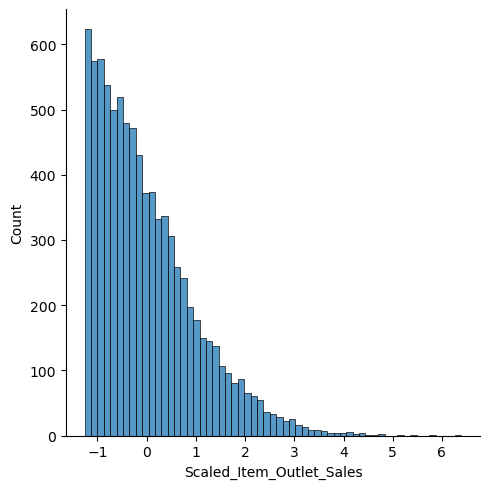

In [77]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std=StandardScaler()
df['Scaled_Item_Outlet_Sales']=std.fit_transform(df[['Item_Outlet_Sales']])
import seaborn as sns
sns.displot(df.Scaled_Item_Outlet_Sales)

In [82]:
df['product_type']=df['Item_Identifier'].apply(lambda x:x[0:2])
df['product_type']
df['product_type']=df['product_type'].map({'FD':'Food','NC':'nonconsumable','DR':'Drinks'})

In [84]:
df['product_type']

0                Food
1              Drinks
2                Food
3                Food
4       nonconsumable
            ...      
8518             Food
8519             Food
8520    nonconsumable
8521             Food
8522           Drinks
Name: product_type, Length: 8523, dtype: object

In [89]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [91]:
data = pd.read_csv("advertising.csv")
data
x=data['TV']
y=data['Sales']
xc=sm.add_constant(x)

In [93]:
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=.2,random_state=10)

In [94]:
from statsmodels.api import OLS

In [120]:
model=OLS(ytrain,xtrain)
model1=model.fit()

ypredict=model1.predict(xtest)



SSE=np.sum((ytest-ypredict)**2)
SSE


291.496142324697

In [121]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     664.5
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.76e-58
Time:                        08:09:57   Log-Likelihood:                -351.10
No. Observations:                 160   AIC:                             706.2
Df Residuals:                     158   BIC:                             712.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9948      0.353     19.804      0.000       6.297       7.692
TV             0.0547      0.002     25.778      0.000       0.051       0.059
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.357
Skew:                           0.114   Prob(JB):                        0.836
Kurtosis:                       3.041   Cond. No.                         340.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
SSR=np.sum((ypredict-ytest.mean())**2)
SSR

1218.4192022002967

In [122]:
SST=SSE+SSR
SST

1509.9153445249938

In [117]:
SME=SSE/len(ypredict)
SME

7.2874035581174255

In [123]:
RMSE=np.sqrt(SME)
RMSE

2.6995191346085003

In [126]:
r_sq=SSR/SST
r_sq

0.8069453738703481

In [ ]:
#lennear rainbow 

In [134]:
from statsmodels.stats.diagnostic import linear_rainbow

n,p=linear_rainbow(model1,frac=0.5)
p

0.6813339070657192

In [137]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

Xc= sm.add_constant(X)
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=.2,random_state=10)
model= sm.OLS(y_train,x_train)
model2=model.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     507.6
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.10e-80
Time:                        08:17:49   Log-Likelihood:                -292.99
No. Observations:                 160   AIC:                             594.0
Df Residuals:                     156   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7931      0.317     15.110      0.0

In [149]:
vif=pd.DataFrame()
vif


""


In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF


In [153]:
vif['vif']=[VIF(X.values,i) for i in range(X.shape[1])]
vif['vif']=[VIF(X.values,i) for i in range(X.shape[1])]
vif['feat']=X.columns
vif

,vif,feat
0,2.486772,TV
1,3.285462,Radio
2,3.055245,Newspaper


In [156]:
a='5'
b='5'
print(type(a+b))

<class 'str'>


In [ ]:
)